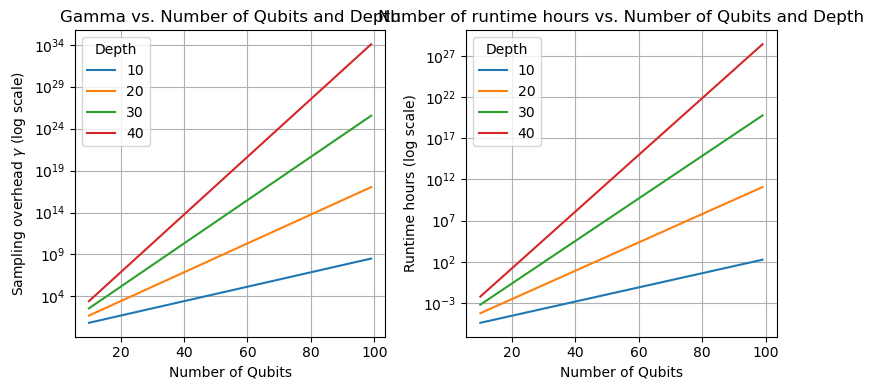

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gamma_bar = 1.02  # per qubit / layer
num_qubits = np.arange(10, 100)
layer_nums = np.array([10, 20, 30, 40])

gamma_layer = gamma_bar**num_qubits
gammas = gamma_layer ** layer_nums[:, np.newaxis]

df = pd.DataFrame(gammas)
df.index.name = "Depth"
df.columns.name = "Number of qubits"
df = df.transpose()
df.index = num_qubits


# Create two axes in one row
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# First axis: Original data
axes[0].semilogy(df)
axes[0].set_title("Gamma vs. Number of Qubits and Depth")
axes[0].set_xlabel("Number of Qubits")
axes[0].set_ylabel("Sampling overhead $\gamma$ (log scale)")
axes[0].grid(True)
axes[0].legend(layer_nums, title="Depth")

# Second axis: Square of the data
epsion = 0.01
beta = 1 / (5000 * 3600)  # / (5000 CLOPs) * 3600 sec/hr 
# axes[1].semilogy(4 * df**2 / epsion**2 * beta)
axes[1].semilogy(df * layer_nums[np.newaxis, :]  * beta) # J = γ̄ nd β d
axes[1].set_title("Number of runtime hours vs. Number of Qubits and Depth")
axes[1].set_xlabel("Number of Qubits")
axes[1].set_ylabel("Runtime hours (log scale)")
axes[1].grid(True)
axes[1].legend(layer_nums, title="Depth")

plt.tight_layout()
plt.show()

In [19]:
df * layer_nums[np.newaxis, :]

Depth,0,1,2,3
10,7.244646e+01,1.049698e+03,1.140704e+04,1.101866e+05
11,8.831183e+01,1.559796e+03,2.066227e+04,2.432963e+05
12,1.076516e+02,2.317775e+03,3.742683e+04,5.372080e+05
13,1.312267e+02,3.444091e+03,6.779353e+04,1.186176e+06
14,1.599647e+02,5.117738e+03,1.227986e+05,2.619125e+06
...,...,...,...,...
95,1.479664e+09,4.378812e+17,9.718758e+25,1.917400e+34
96,1.803702e+09,6.506685e+17,1.760419e+26,4.233695e+34
97,2.198703e+09,9.668592e+17,3.188754e+26,9.348166e+34
98,2.680207e+09,1.436702e+18,5.775987e+26,2.064112e+35


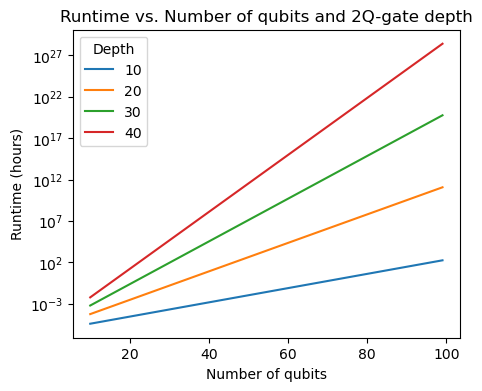

In [19]:
# Create two axes in one row
plt.figure(figsize=(5, 4))

epsion = 0.01
beta = 1 / (5000 * 3600)  # / (5000 CLOPs) * 3600 sec/hr 
# axes[1].semilogy(4 * df**2 / epsion**2 * beta)
plt.semilogy(df * layer_nums[np.newaxis, :]  * beta) # J = γ̄ nd β d
plt.title("Runtime vs. Number of qubits and 2Q-gate depth")
plt.xlabel("Number of qubits")
plt.ylabel("Runtime (hours)")
plt.legend(layer_nums, title="Depth")
# ax = plt.gca()
# ax.grid(True)
# ax.legend(layer_nums, title="Depth")